# Assigment week 1: Activity Trackers 

### Loading the first CSV
Started out with loading in the datasets. The file steps.csv is shaped in a European CSV format. With the function sep=';' I created a file like an American style CSV format in order to eventually be able to merge this csv with de survey.csv. 

Second I replaced the NaN with a 0 to clean the dataFrame. 

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 

df1 = pd.read_csv('steps.csv', sep=';')
df1 = df1.fillna(0)
df1.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,0.0,0.0,0.0,0.0,3941.0,15733.0,9929.0,12879.0,10541.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,0.0,0.0,0.0,6227.0,4567.0,2567.0,1129.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Loading the second CSV 

This DataFrame didn't need much cleaning. 


In [2]:
df2 = pd.read_csv('survey.csv')
df2.head()


,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


### Merging the two DataFrames

The two DataFrame are merged through a commen idenifier: "id". 

In [3]:
df = pd.merge(df1, df2, on = 'id')
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,0.0,0.0,0.0,0.0,3941.0,15733.0,9929.0,12879.0,10541.0,...,0.0,0.0,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,0.0,0.0,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,0.0,0.0,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,0.0,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,0.0,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


### Creating a new DataFrame 

Here the columns containing with a date name are summed accros all rows. Next, with these summed coloms a new DataFrame is created names df_steps. 

Third, the dates are transformed into datatimes to be able to work these dates me easily. 

In [4]:
df_steps = df.loc[:, '20-6-2013':'13-5-2014'].sum().reset_index(name="Total_steps")

df_steps['Total_steps'] = df_steps['Total_steps'].astype(int)
df_steps['index'] = df_steps['index'].apply(pd.to_datetime, errors='coerce')


df_steps

,index,Total_steps
0,2013-06-20,87418
1,2013-06-21,2195438
2,2013-06-22,3027319
3,2013-06-23,2191243
4,2013-06-24,2871071
...,...,...
323,2014-09-05,679519
324,2014-10-05,654877
325,2014-11-05,551280
326,2014-12-05,495365


### Visualizing the data 

This first graph shows two peaks. Also it shows some days very few steps were taken. Through the 'kde' we can see that the peaks are, when smoothed out, are similair. 



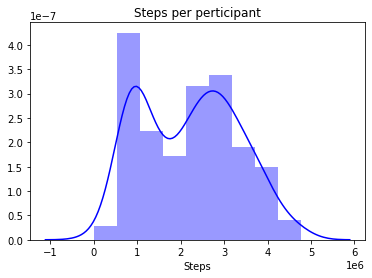

In [10]:
sns.distplot(df_steps['Total_steps'].dropna(), kde=True, color='blue') 
plt.title('Steps per perticipant')
plt.xlabel('Steps')
plt.show()

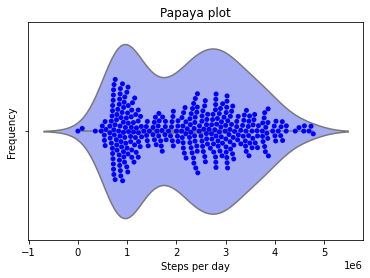

In [6]:
sns.violinplot(df_steps['Total_steps'], color='#94a0ff')
sns.swarmplot(df_steps['Total_steps'], color='blue') #default color doesn't stand out
plt.title('Papaya plot')
plt.ylabel('Frequency')
plt.xlabel('Steps per day')
plt.show()

Here we can see that there are not many outliers within these this DataFrame.

The median filesize is: 2299571.0 MB
The mean filesize is: 2195772.100609756 MB


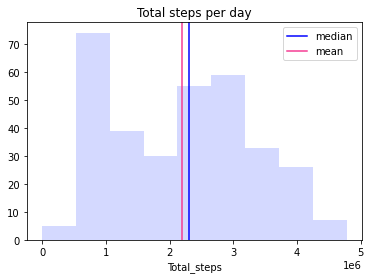

In [7]:
mean_size = df_steps['Total_steps'].mean()
median_size = df_steps['Total_steps'].median()

print(f'The median filesize is: {median_size} MB')
print(f'The mean filesize is: {mean_size} MB')

file_size = df_steps['Total_steps'].dropna()
sns.distplot(file_size, color='#94a0ff', kde=False)
plt.title('Total steps per day')
plt.axvline(median_size, 0, 100, color='blue', label='median') 
plt.axvline(mean_size, 0, 100, color='#f53b92', label='mean') 
plt.legend() 
plt.show()

Here we can see that the median and the mean are very close to each other. 

Text(0.5, 1.0, 'Steps per day')

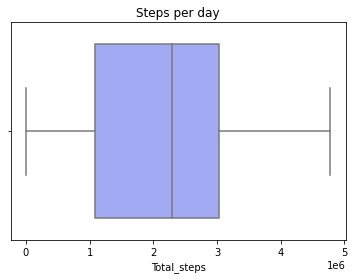

In [12]:
sns.boxplot(x=df_steps["Total_steps"], color='#94a0ff')
plt.title('Steps per day')

Finally, this boxplot shows that the data is a bit right skewed. 